# Kevin Magnussen


### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">

In [2]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [3]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [4]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

mag_laps <- lap_data %>%
            filter(driverId == 825)

# Season Analysis

raceId,n
<dbl>,<int>
1046,87
990,57
949,56
1011,56
1045,56
902,40
971,8


`geom_smooth()` using formula 'y ~ x'



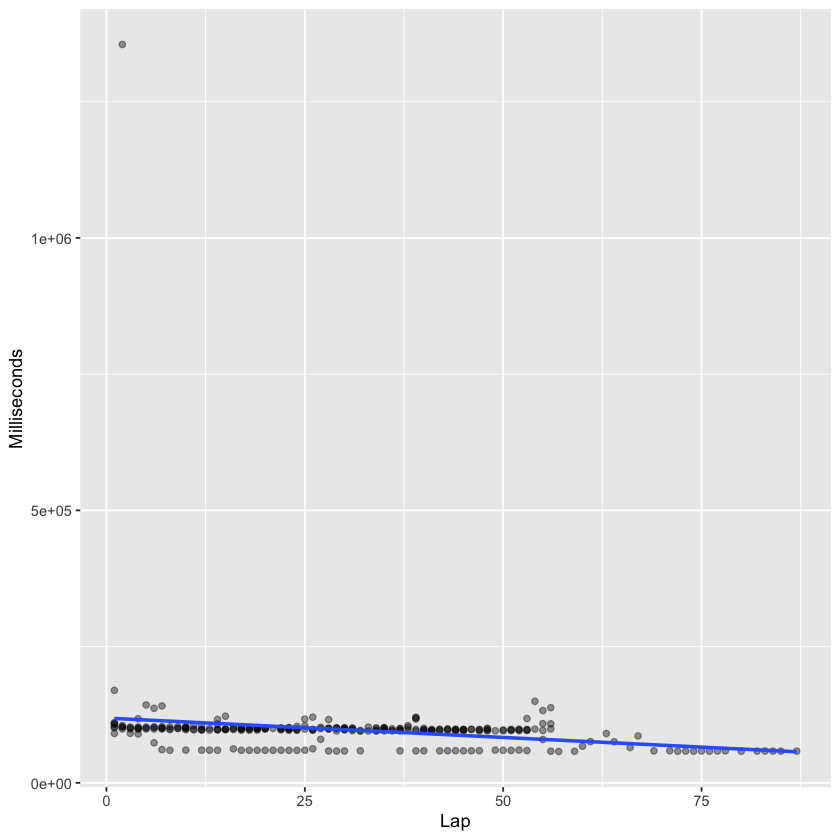

In [5]:
#1. Bahrain 

km_bahrain <- mag_laps %>%
                filter(raceId %in% bahrain_race_ID) 

km_bahrain_clean <- km_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
km_bahrain_clean
km_bahrain_clean_ID <- km_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_bahrain_races <- mag_laps %>%
                    filter(raceId %in% km_bahrain_clean_ID)

formulaone_split <- initial_split(km_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [6]:
#2.  Saudi Arabia

# km_saudi <- mag_laps %>%
#                 filter(raceId %in% saudi_race_ID) 

# km_saudi_clean <- km_saudi %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# km_saudi_clean
# km_saudi_clean_ID <- km_saudi_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# km_saudi_races <- mag_laps %>%
#                     filter(raceId %in% km_saudi_clean_ID)

# formulaone_split <- initial_split(km_saudi_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

raceId,n
<dbl>,<int>
1010,58
900,57
948,57
969,46
989,22


`geom_smooth()` using formula 'y ~ x'



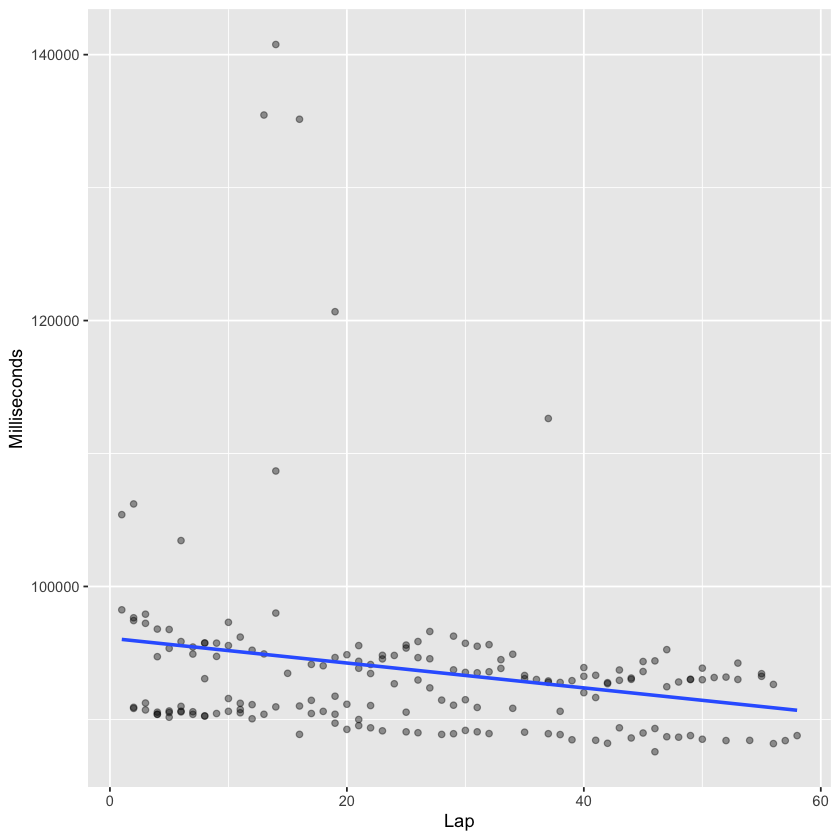

In [7]:
#3.  Australia

km_aus <- mag_laps %>%
                filter(raceId %in% aus_race_ID) 

km_aus_clean <- km_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_aus_clean
km_aus_clean_ID <- km_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_aus_races <- mag_laps %>%
                    filter(raceId %in% km_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(5:1000)

formulaone_split <- initial_split(km_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1043,47


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



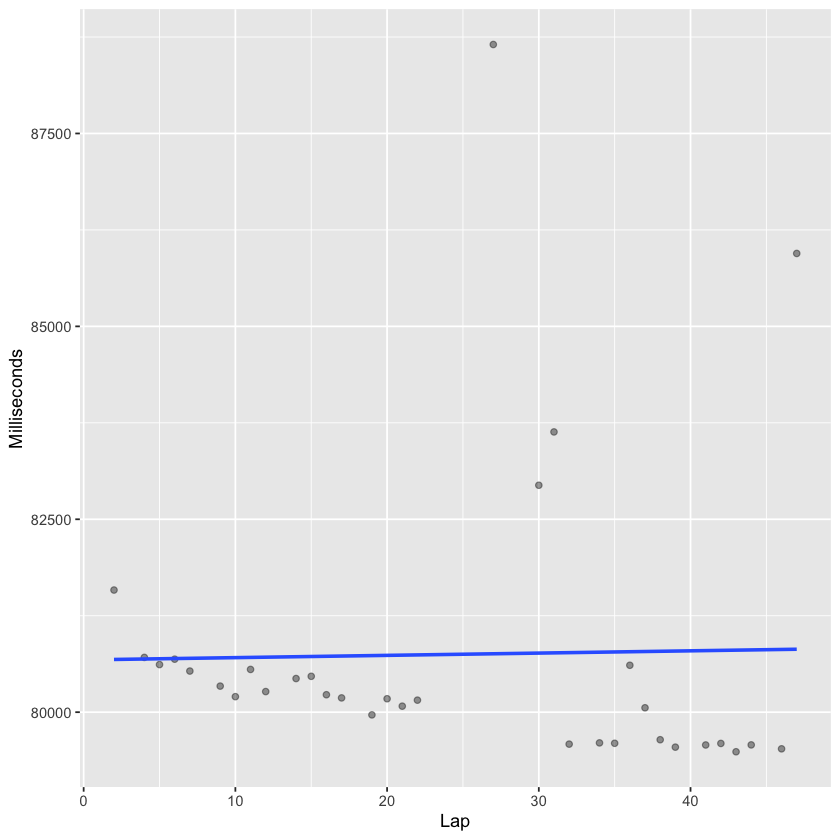

In [8]:
#4.  Italy, Imola

km_imola <- mag_laps %>%
                filter(raceId %in% imola_race_ID) 

km_imola_clean <- km_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_imola_clean
km_imola_clean_ID <- km_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_imola_races <- mag_laps %>%
                    filter(raceId %in% km_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(km_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1044,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



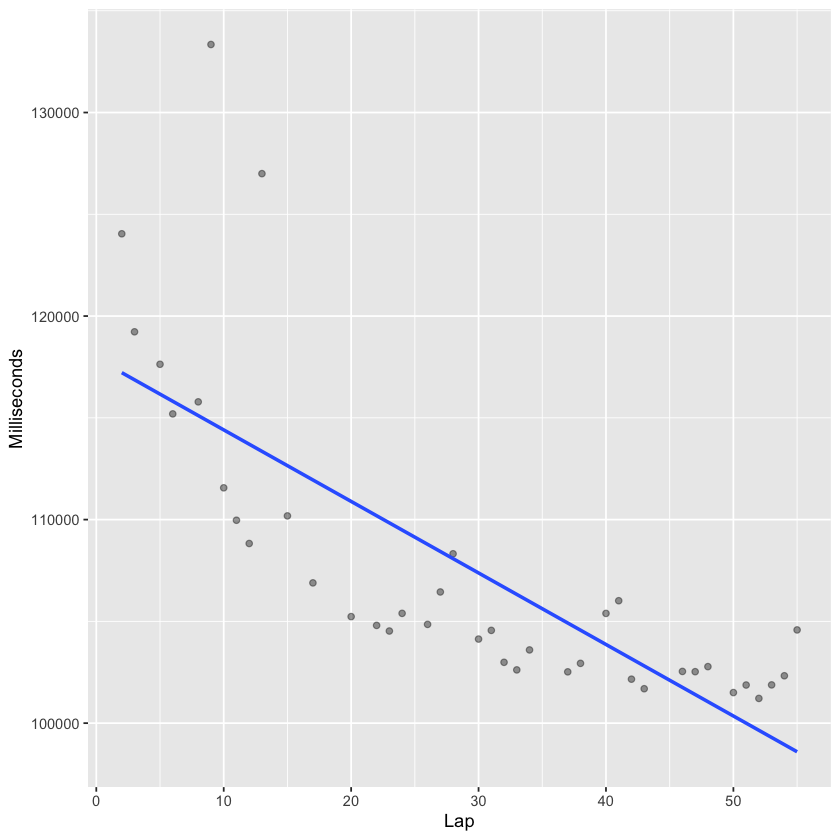

In [9]:
#5. Turkey (Replacing Miami)

km_turkey <- mag_laps %>%
                filter(raceId %in% turkey_race_ID) 

km_turkey_clean <- km_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_turkey_clean
km_turkey_clean_ID <- km_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_turkey_races <- mag_laps %>%
                    filter(raceId %in% km_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(km_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1044,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



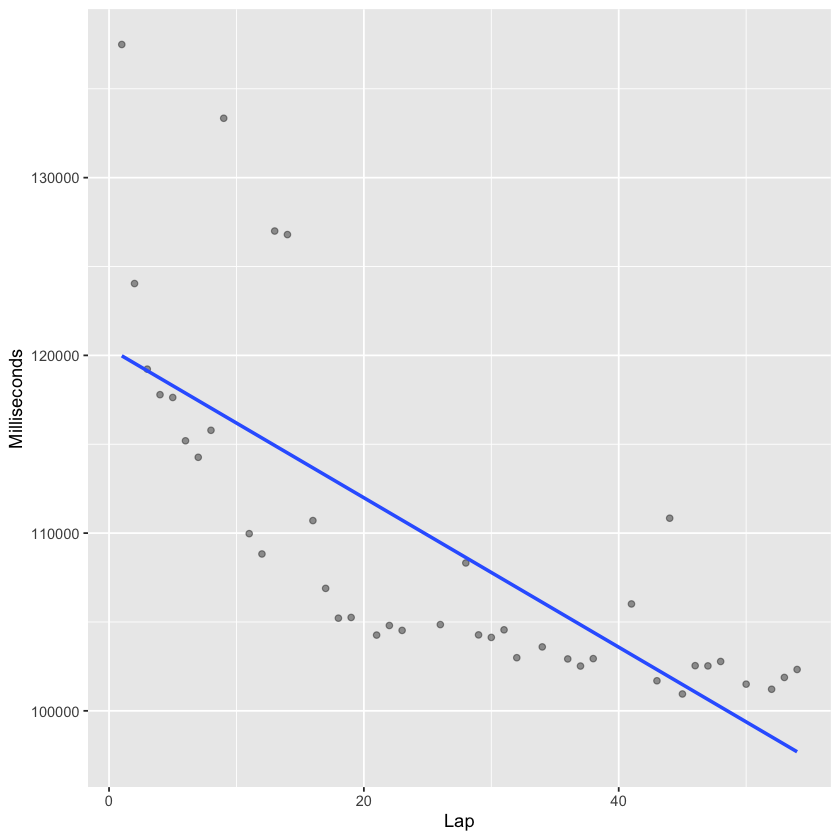

In [11]:
#5. Turkey (Replacing Miami)

km_turkey <- mag_laps %>%
                filter(raceId %in% turkey_race_ID) 

km_turkey_clean <- km_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_turkey_clean
km_turkey_clean_ID <- km_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_turkey_races <- mag_laps %>%
                    filter(raceId %in% km_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) 

formulaone_split <- initial_split(km_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,66
904,65
952,65
993,65
1036,65
973,64


`geom_smooth()` using formula 'y ~ x'



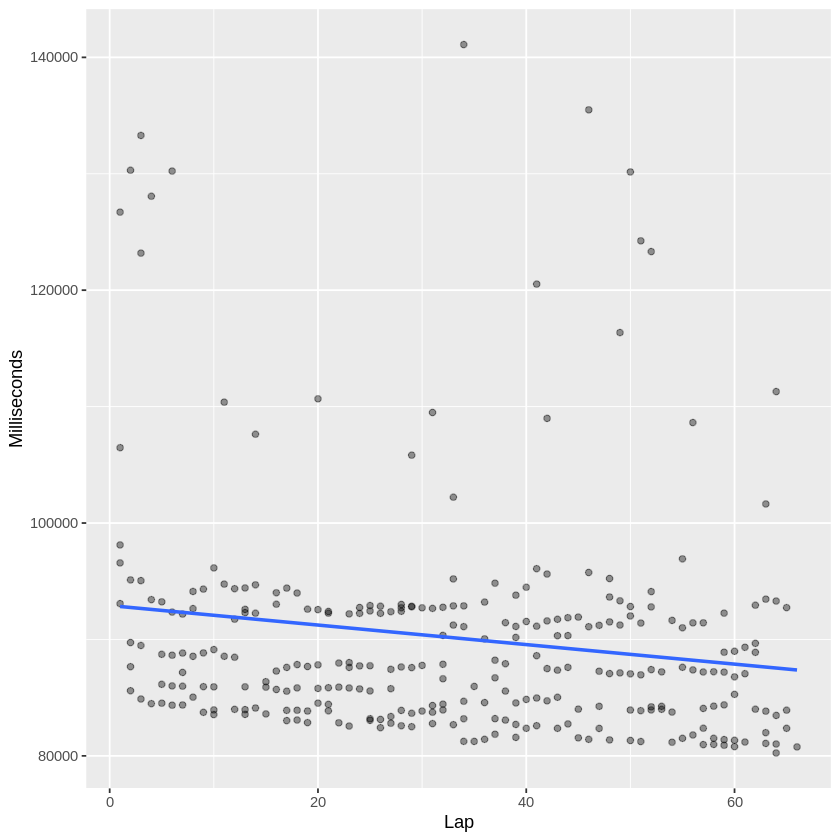

In [48]:
#6. Spain

km_spain <- mag_laps %>%
                filter(raceId %in% spain_race_ID) 

km_spain_clean <- km_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_spain_clean
km_spain_clean_ID <- km_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_spain_races <- mag_laps %>%
                    filter(raceId %in% km_spain_clean_ID)

formulaone_split <- initial_split(km_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
974,78
994,78
905,77
1015,77
953,32


`geom_smooth()` using formula 'y ~ x'



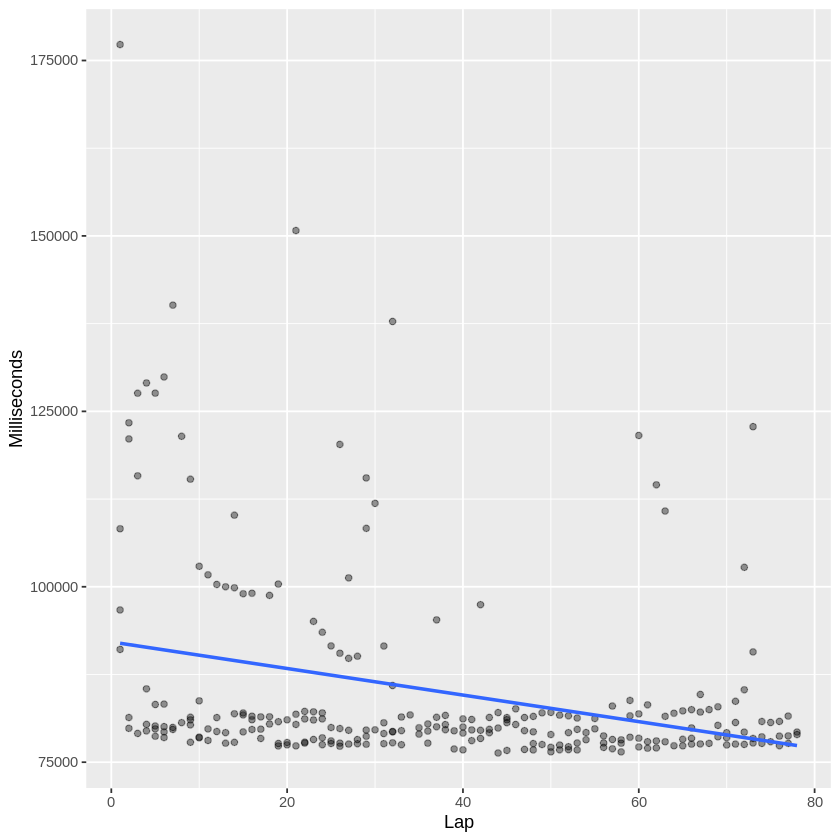

In [49]:
#7.   Monaco

km_monaco <- mag_laps %>%
                filter(raceId %in% monaco_race_ID) 

km_monaco_clean <- km_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_monaco_clean
km_monaco_clean_ID <- km_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_monaco_races <- mag_laps %>%
                    filter(raceId %in% km_monaco_clean_ID)

formulaone_split <- initial_split(km_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
955,50
1013,50


`geom_smooth()` using formula 'y ~ x'



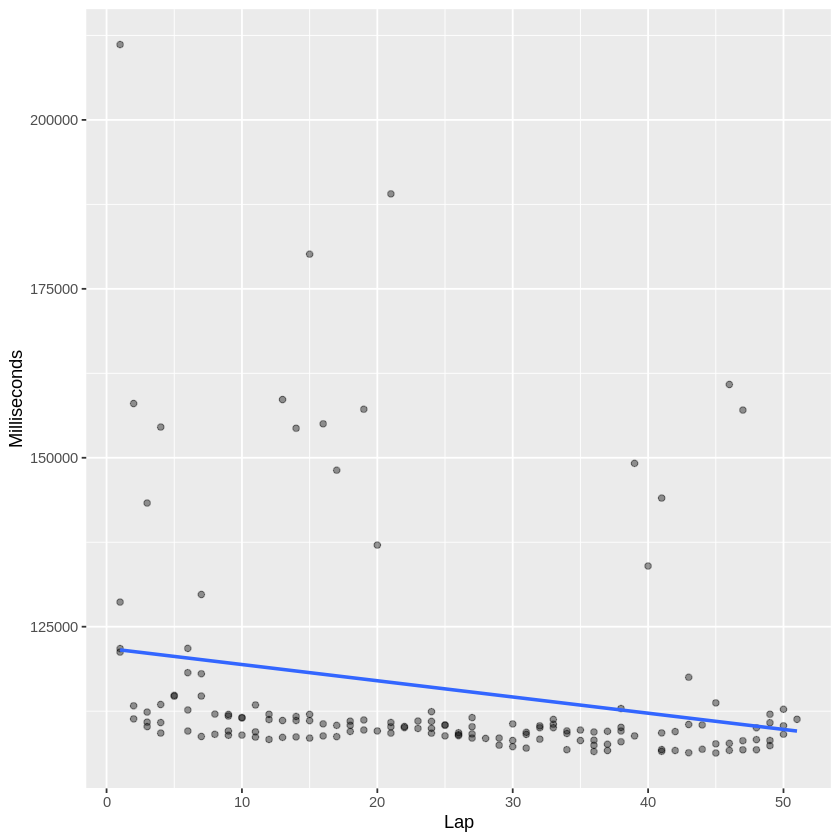

In [50]:
#8.  Azerbaijan

km_azerbaijan <- mag_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

km_azerbaijan_clean <- km_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_azerbaijan_clean
km_azerbaijan_clean_ID <- km_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_azerbaijan_races <- mag_laps %>%
                    filter(raceId %in% km_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
906,70
975,69
954,68
1016,68
995,67


`geom_smooth()` using formula 'y ~ x'



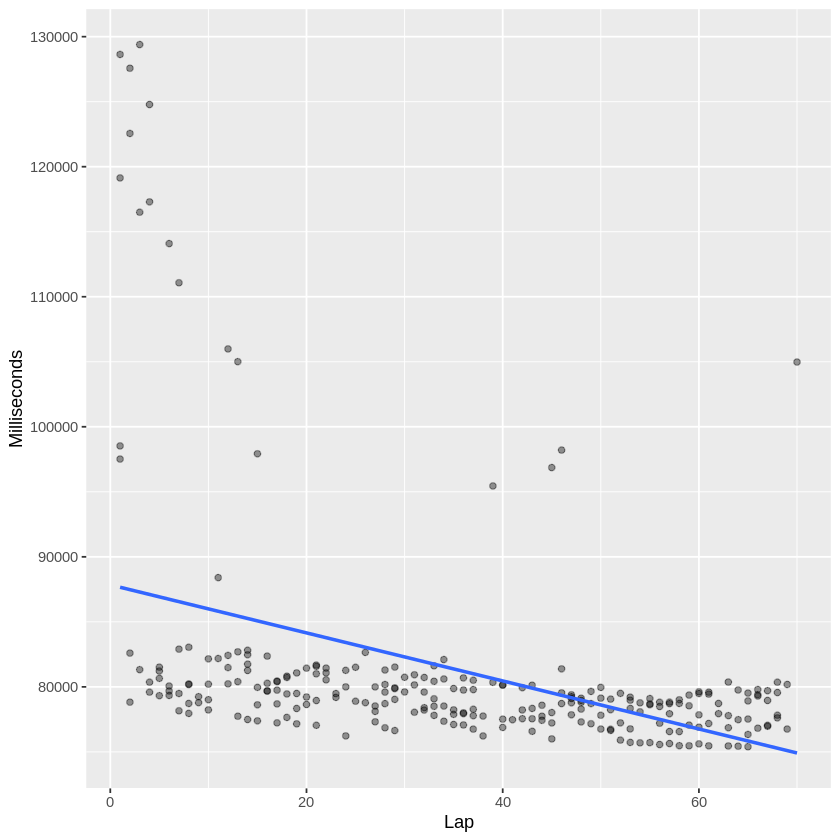

In [51]:
#9.  Canada

km_canada <- mag_laps %>%
                filter(raceId %in% canada_race_ID) 

km_canada_clean <- km_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_canada_clean
km_canada_clean_ID <- km_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_canada_races <- mag_laps %>%
                    filter(raceId %in% km_canada_clean_ID)

formulaone_split <- initial_split(km_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



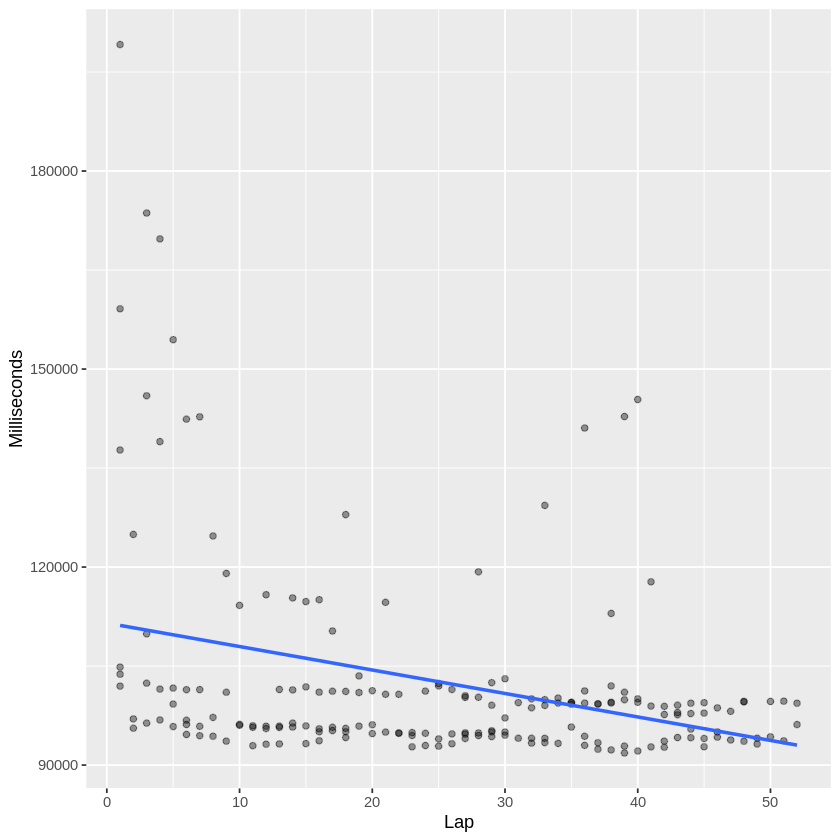

In [52]:
#10.  Great Britain

km_uk <- mag_laps %>%
                filter(raceId %in% uk_race_ID) 

km_uk_clean <- km_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_uk_clean_ID <- km_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_uk_races <- mag_laps %>%
                    filter(raceId %in% km_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



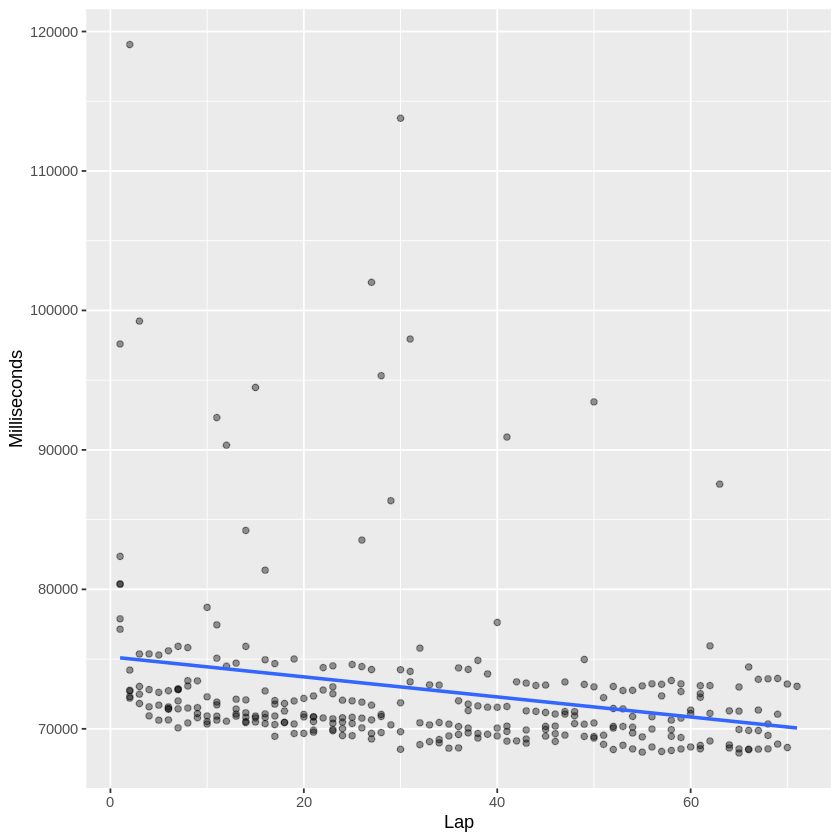

In [53]:
#11.  Austria

km_austria <- mag_laps %>%
                filter(raceId %in% austria_race_ID) 

km_austria_clean <- km_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_austria_clean_ID <- km_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_austria_races <- mag_laps %>%
                    filter(raceId %in% km_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,52


`geom_smooth()` using formula 'y ~ x'



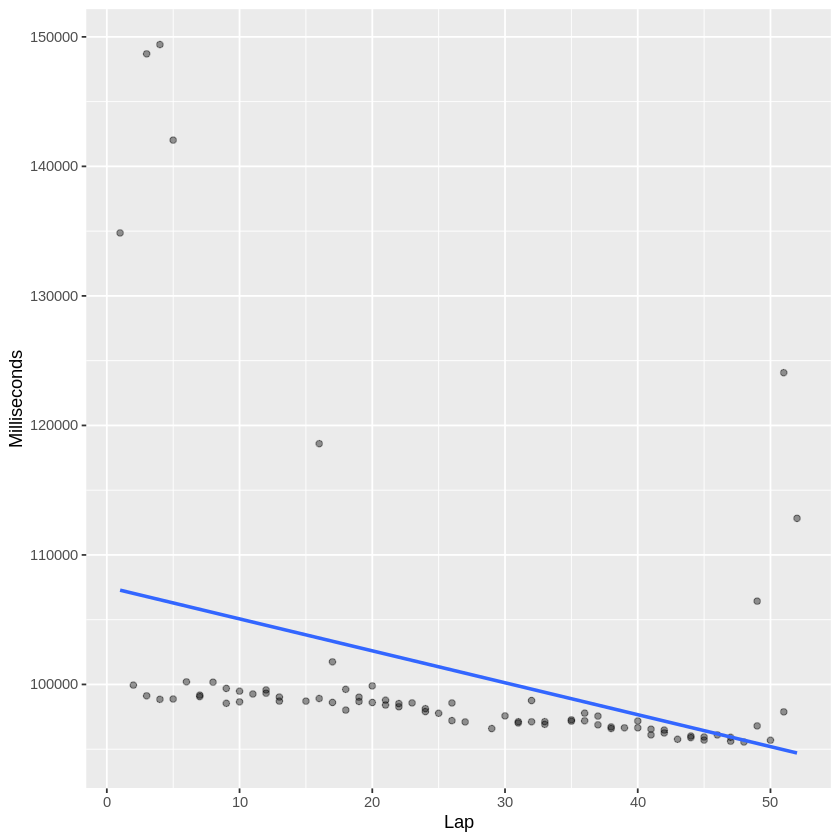

In [54]:
#12.  France

km_france <- mag_laps %>%
                filter(raceId %in% france_race_ID) 

km_france_clean <- km_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_france_clean
km_france_clean_ID <- km_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_france_races <- mag_laps %>%
                    filter(raceId %in% km_france_clean_ID)

formulaone_split <- initial_split(km_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



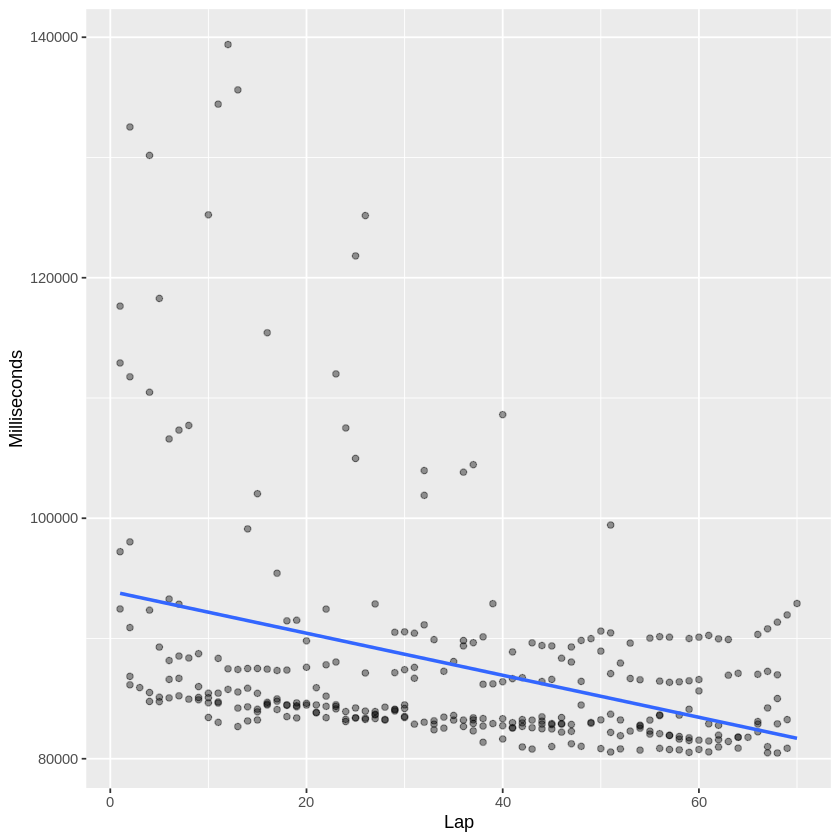

In [55]:
#13.  Hungary

km_hungary <- mag_laps %>%
                filter(raceId %in% hungary_race_ID) 

km_hungary_clean <- km_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

km_hungary_clean_ID <- km_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_hungary_races <- mag_laps %>%
                    filter(raceId %in% km_hungary_clean_ID)

formulaone_split <- initial_split(km_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
911,44
980,44
1001,44
1037,44
1022,43
960,5


`geom_smooth()` using formula 'y ~ x'



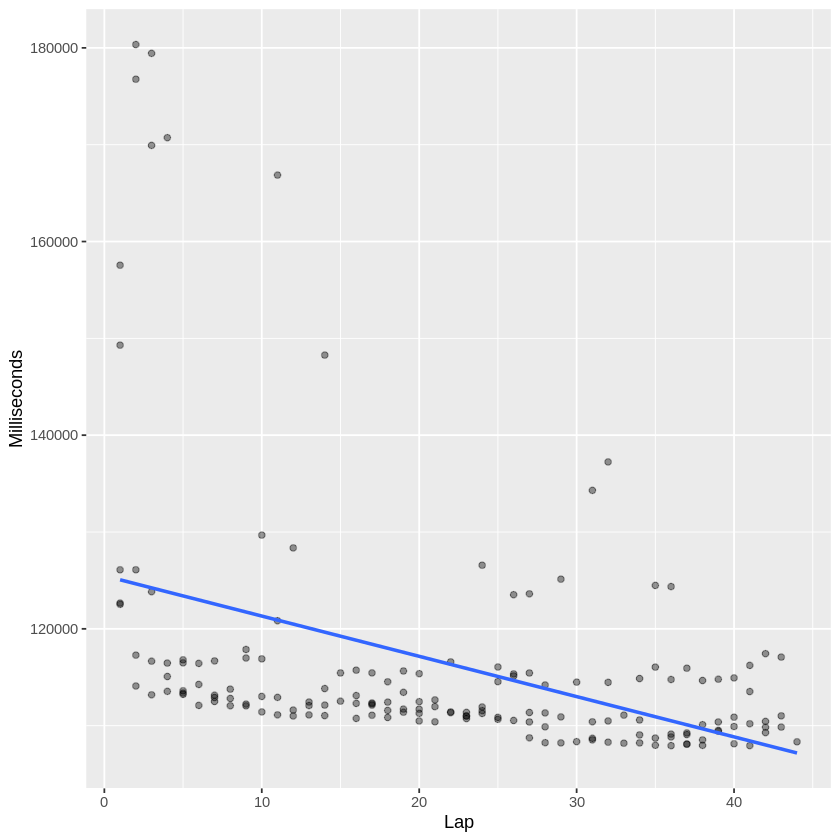

In [56]:
#14.  Belgium

km_belgium <- mag_laps %>%
                filter(raceId %in% belgium_race_ID) 

km_belgium_clean <- km_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_belgium_clean
km_belgium_clean_ID <- km_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_belgium_races <- mag_laps %>%
                    filter(raceId %in% km_belgium_clean_ID)

formulaone_split <- initial_split(km_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

In [57]:
#15.  Netherlands

# km_netherlands <- mag_laps %>%
#                 filter(raceId %in% netherlands_race_ID) 

# km_netherlands_clean <- km_netherlands %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# km_netherlands_clean
# km_netherlands_clean_ID <- km_netherlands_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# km_netherlands_races <- mag_laps %>%
#                     filter(raceId %in% km_netherlands_clean_ID)

# formulaone_split <- initial_split(km_netherlands_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
912,53
961,52
981,52
1002,52
1023,43
1038,17


`geom_smooth()` using formula 'y ~ x'



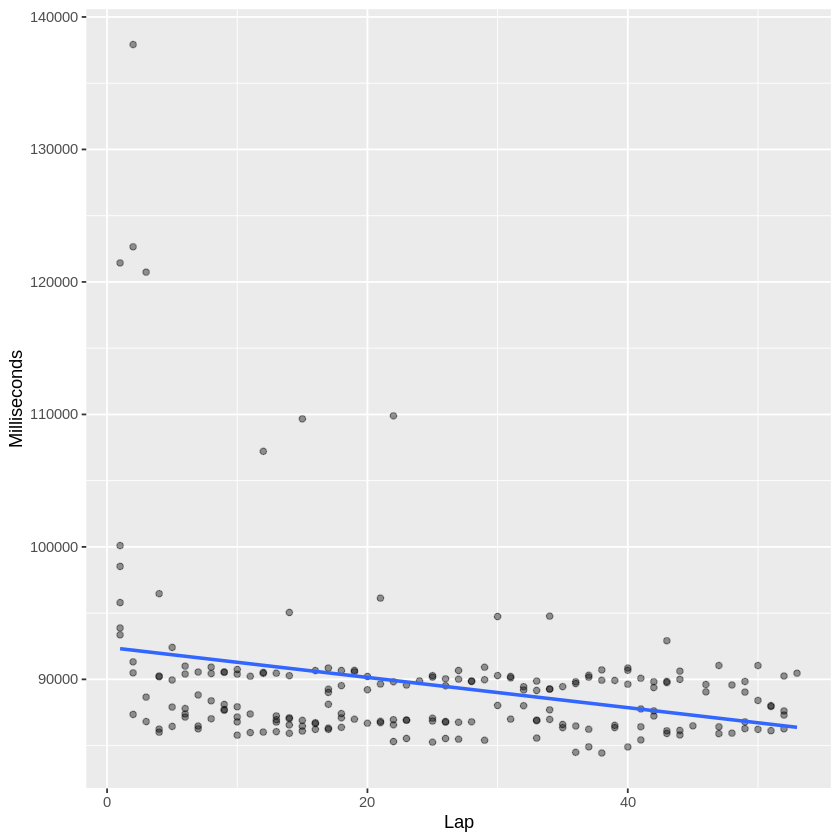

In [58]:
#16.  Italy, Monza

km_monza <- mag_laps %>%
                filter(raceId %in% monza_race_ID) 

km_monza_clean <- km_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
km_monza_clean
km_monza_clean_ID <- km_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_monza_races <- mag_laps %>%
                    filter(raceId %in% km_monza_clean_ID)

formulaone_split <- initial_split(km_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



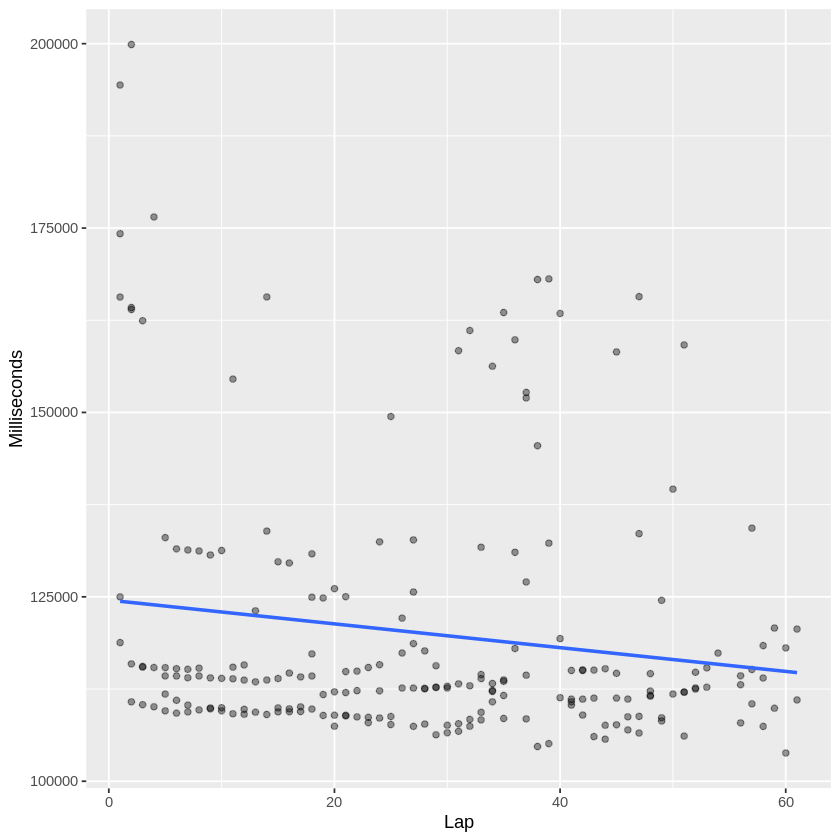

In [59]:
#17.  Singapore

km_singapore <- mag_laps %>%
                filter(raceId %in% singapore_race_ID) 

km_singapore_clean <- km_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_singapore_clean_ID <- km_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_singapore_races <- mag_laps %>%
                    filter(raceId %in% km_singapore_clean_ID)

formulaone_split <- initial_split(km_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



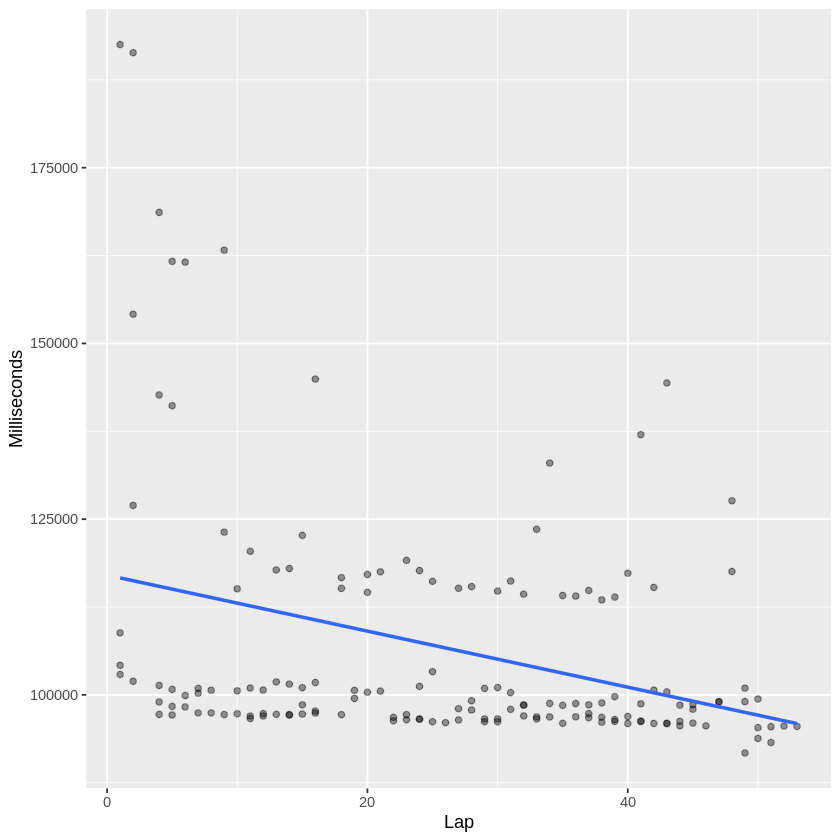

In [60]:
#18. Japan

km_japan <- mag_laps %>%
                filter(raceId %in% japan_race_ID) 

km_japan_clean <- km_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_japan_clean_ID <- km_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_japan_races <- mag_laps %>%
                    filter(raceId %in% km_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()


`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



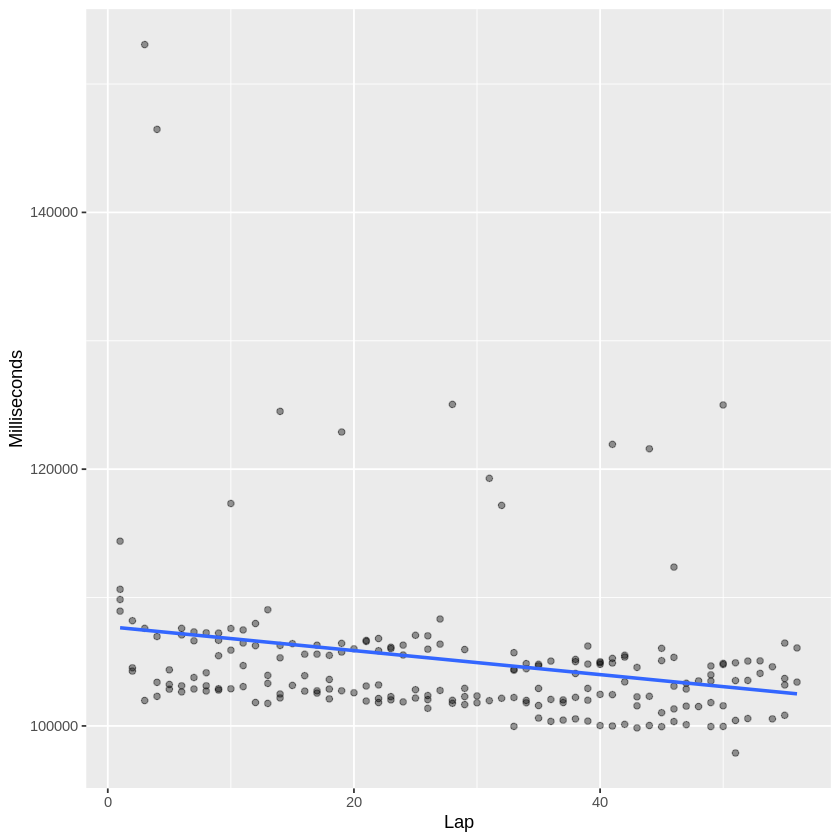

In [61]:
#19. USA, Austin

km_austin <- mag_laps %>%
                filter(raceId %in% austin_race_ID) 

km_austin_clean <- km_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_austin_clean_ID <- km_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_austin_races <- mag_laps %>%
                    filter(raceId %in% km_austin_clean_ID)

formulaone_split <- initial_split(km_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



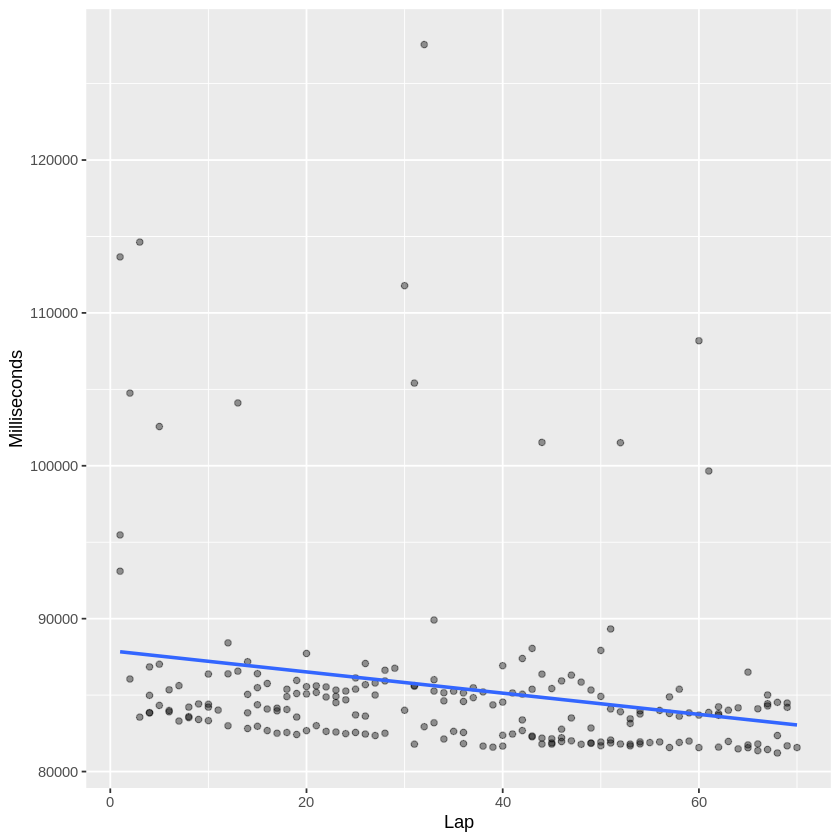

In [62]:
#20. Mexico

km_mexico <- mag_laps %>%
                filter(raceId %in% mexico_race_ID) 

km_mexico_clean <- km_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_mexico_clean_ID <- km_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_mexico_races <- mag_laps %>%
                    filter(raceId %in% km_mexico_clean_ID)

formulaone_split <- initial_split(km_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



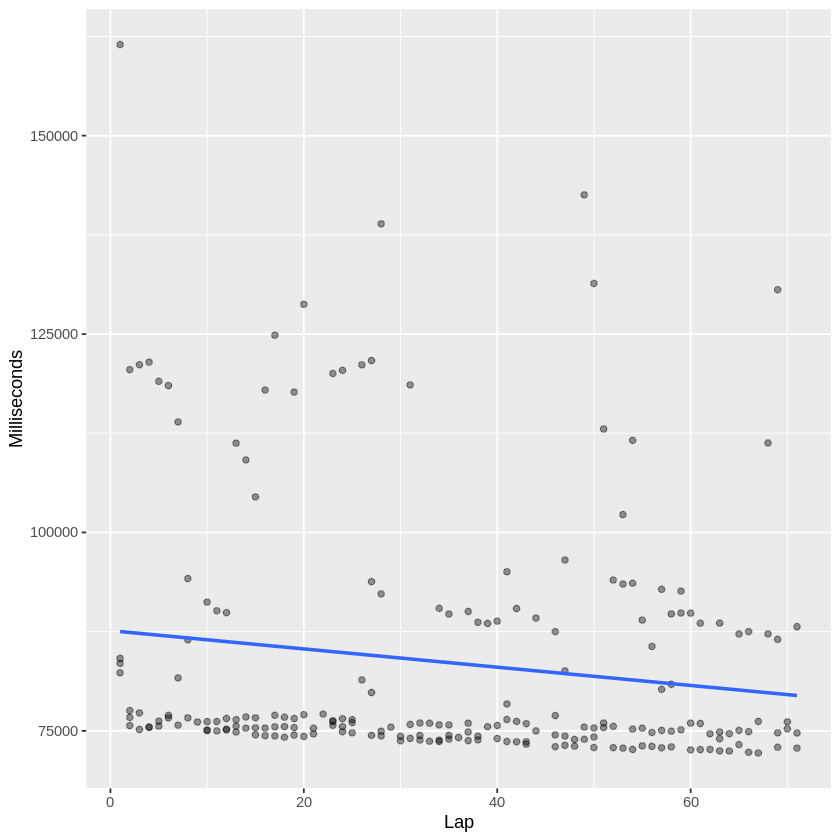

In [63]:
#21. Brazil

km_brazil <- mag_laps %>%
                filter(raceId %in% brazil_race_ID) 

km_brazil_clean <- km_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_brazil_clean_ID <- km_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_brazil_races <- mag_laps %>%
                    filter(raceId %in% km_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(km_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
918,55
988,54
1009,54
1030,54
1047,54
968,5


`geom_smooth()` using formula 'y ~ x'



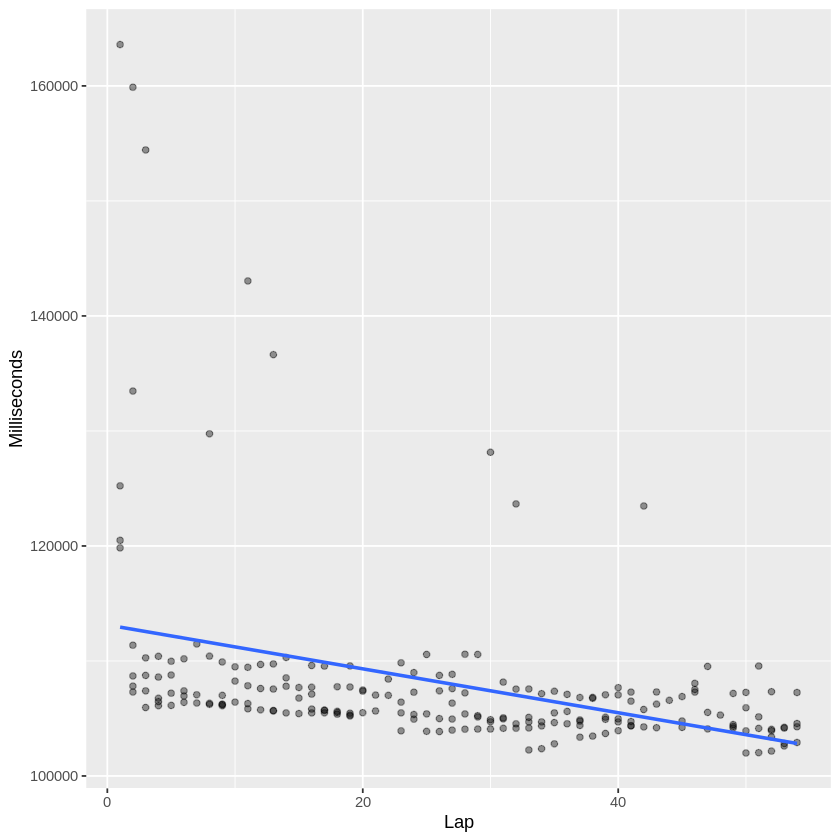

In [64]:
#22. Abu Dhabi

km_uae <- mag_laps %>%
                filter(raceId %in% uae_race_ID) 

km_uae_clean <- km_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_uae_clean
km_uae_clean_ID <- km_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_uae_races <- mag_laps %>%
                    filter(raceId %in% km_uae_clean_ID)

formulaone_split <- initial_split(km_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()